In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy, math

%matplotlib inline

In [5]:
# loading dataset
X_train, y_train = load_data("data/ex2data1.txt")
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (100, 2)
y_train.shape: (100,)


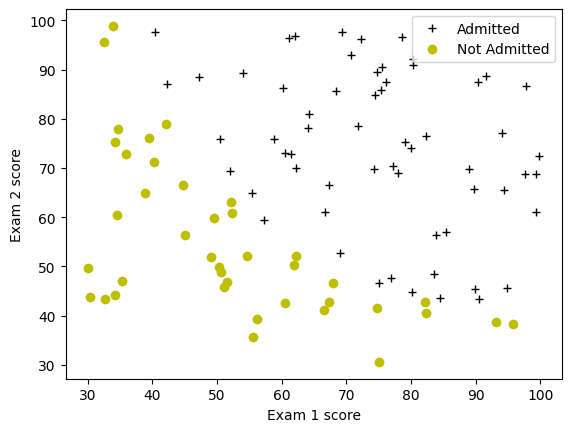

In [16]:
# visualizing data
pos = y_train == 1
neg = y_train == 0

plt.plot(X_train[pos, 0], X_train[pos, 1], 'k+', label="Admitted")
plt.plot(X_train[neg, 0], X_train[neg, 1], 'yo', label="Not Admitted")

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc="upper right")
plt.show()

In [18]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    z = np.clip(z, -500, 500)
    g = 1.0 / (1.0 + np.exp(-z))
    return g

In [25]:
# checking sigmoid
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(np.array([-1,0,1,2])))

0.5
0.7310585786300049
[0.26894142 0.5        0.73105858 0.88079708]


In [29]:
def compute_cost(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : scalar Values of bias parameter of the model
      lambda_: for regularization
    Returns:
      total_cost: (scalar)         cost
    """
    m,n = X.shape
    cost = 0.

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i)
    cost /= m

    reg_cost = 0.
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost = (lambda_ / (2 * m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [30]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.139


In [31]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: -0.108


In [32]:
def compute_gradient(X, y, w, b, lambda_ = 1):
    """
    Computes the gradient for logistic regression
    Args:
      X : (ndarray Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) values of parameters of the model
      b : (scalar)                 value of parameter of the model
      lambda_: for regularization.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_db, dj_dw

In [33]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [34]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.82935361787379, -44.37884124953978]


In [36]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function, lambda_ = 1):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append(cost_function(X, y, w, b, lambda_))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history

In [38]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                    iterations, alpha, compute_cost, compute_gradient, 0)


Iteration    0: Cost     0.97
Iteration 1000: Cost    -0.04
Iteration 2000: Cost    -0.04
Iteration 3000: Cost    -0.04
Iteration 4000: Cost    -0.04
Iteration 5000: Cost    -0.04
Iteration 6000: Cost    -0.04
Iteration 7000: Cost    -0.04
Iteration 8000: Cost    -0.04
Iteration 9000: Cost    -0.04


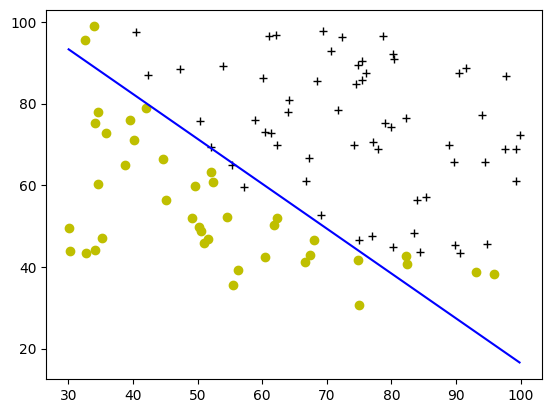

In [39]:
plot_decision_boundary(w, b, X_train, y_train)

In [45]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = np.dot(X[i], w)
        for j in range(n):
            z_wb += 0

        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb > 0.5 else 0

    return p

In [46]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


In [47]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
